In [1]:
from qsweepy import *
from qsweepy.instruments import *
import numpy as np
%matplotlib

Using matplotlib backend: Qt5Agg


In [23]:
adc = TSW14J56_evm(fpga_config= True)

ADS54J40 already programmed


In [3]:
adc_reducer = TSW14J56_evm_reducer(adc)

In [4]:
adc.nsamp = 2048
adc.nsegm = 1

In [7]:
adc.system_reset()

Capture failed


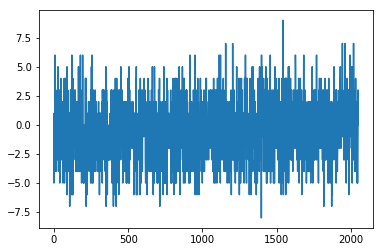

In [9]:
plt.plot(np.real(adc_reducer.measure()['Voltage'][0]))

In [5]:
adc.nsegm = 4
adc.nsamp = 2048

In [4]:
adc.capture(trig='man')

Write: 0x0 0x30 0x4
Write: 0x0 0x10 0x100
Write: 0x0 0x0 0x21
Read: 0x0 0x0 0x20
Done!


In [7]:
32768*2

65536

In [5]:
data = adc.get_data()

Write: 0x4 0x10 0x200
Write: 0x4 0x0 0x1


In [6]:
data

array([[-2.+0.j, -5.+0.j,  1.-3.j, ...,  0.-5.j,  3.+0.j,  1.-1.j],
       [-2.+2.j, -3.+0.j,  3.-3.j, ..., -5.+0.j,  2.-3.j, -1.-3.j],
       [ 3.-1.j, -3.-2.j,  0.-2.j, ..., -7.+0.j, -3.+3.j,  0.+0.j],
       [-2.+1.j,  2.+1.j, -3.-2.j, ...,  0.-2.j,  1.+3.j,  3.-4.j]])

In [9]:
np.reshape(data, (2, adc.nsamp*adc.nsegm))

array([[ 4, -1, -2, ...,  0,  1,  3],
       [ 0,  0, -3, ..., -2,  3, -4]], dtype=int16)

In [11]:
dataiq = np.reshape(data, (2, adc.nsamp*adc.nsegm))[0]+ 1j*np.reshape(data, (2, adc.nsamp*adc.nsegm))[1]

In [15]:
dataiqsegm = np.reshape(dataiq, (adc.nsegm, int(adc.nsamp)))

In [19]:
len(dataiqsegm[0])

2048

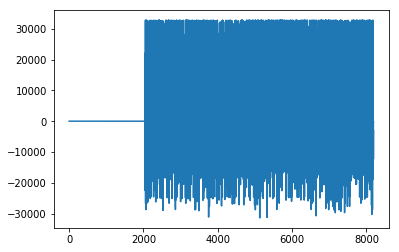

In [10]:
plt.plot(np.reshape(data, (adc.nsamp*adc.nsegm, 2)).

In [16]:
plt.plot(adc.get_data()[0][0])
plt.plot(adc.get_data()[1][0])

Write: 0x4 0x10 0x80
Write: 0x4 0x0 0x1
Write: 0x4 0x10 0x80
Write: 0x4 0x0 0x1


In [9]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [1]:
import time

In [ ]:
time.sleep()